In [2]:
%pylab inline
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


In [3]:
import cv2

In [34]:
img = cv2.imread('img.jpg')
img2 = cv2.imread('img.jpg')
img3 = cv2.imread('img.jpg')
#img = ndimage.gaussian_filter(img1, sigma=1)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
ret2, thresh2 = cv2.threshold(gray,255,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [35]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.4*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [36]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [37]:
markers = cv2.watershed(img,markers)

In [38]:
img[markers == -1] = [255,0,0]

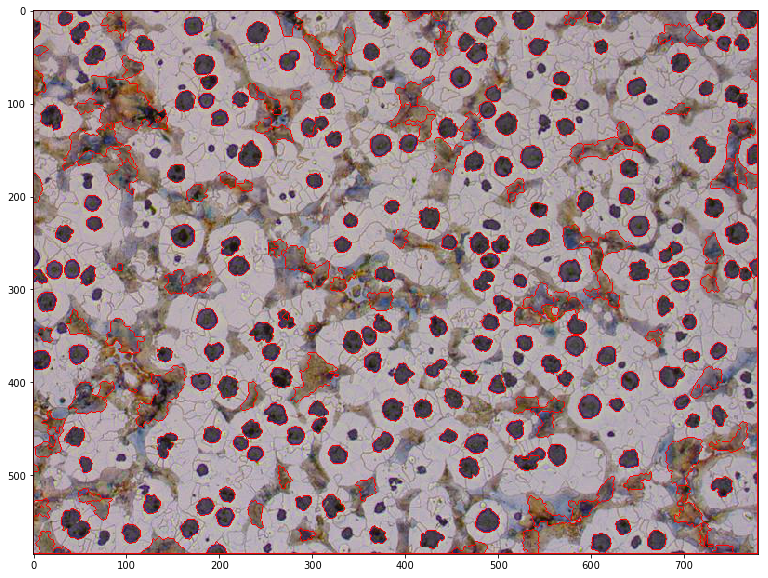

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(img)

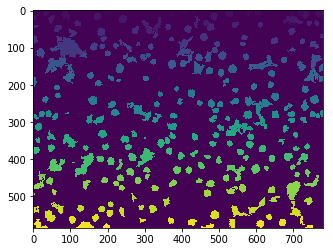

In [40]:
plt.imshow(markers)

In [41]:
for i in range (0,len(img)):
    for y in range(0,len(img[0])):
        for z in range(0,len(img[0][0])):
        
            img2[i][y][z]=0

In [42]:
img2[markers == -1] = [255,255,255]

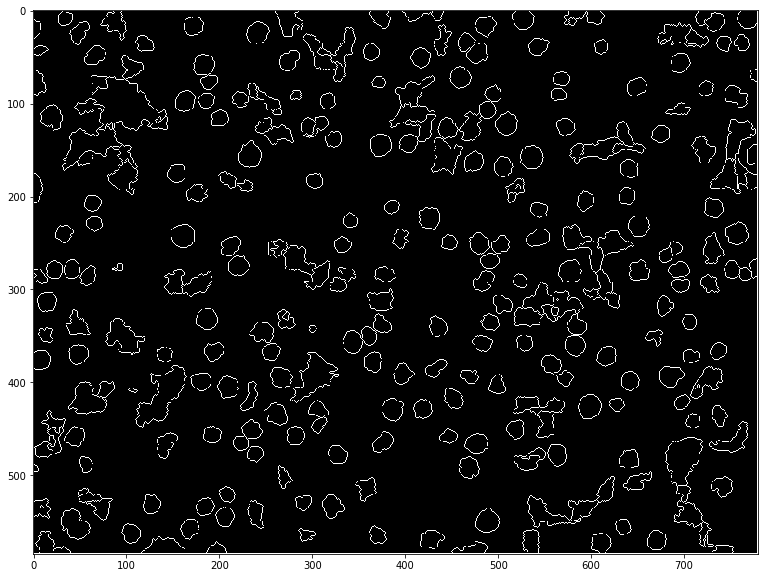

In [43]:
plt.figure(figsize=(20,10))
plt.imshow(img2)

In [44]:
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

In [45]:
gray3 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [50]:
hough_radii = np.arange(5,50,1)
hough_res = hough_circle(gray3, hough_radii)

In [53]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=150)

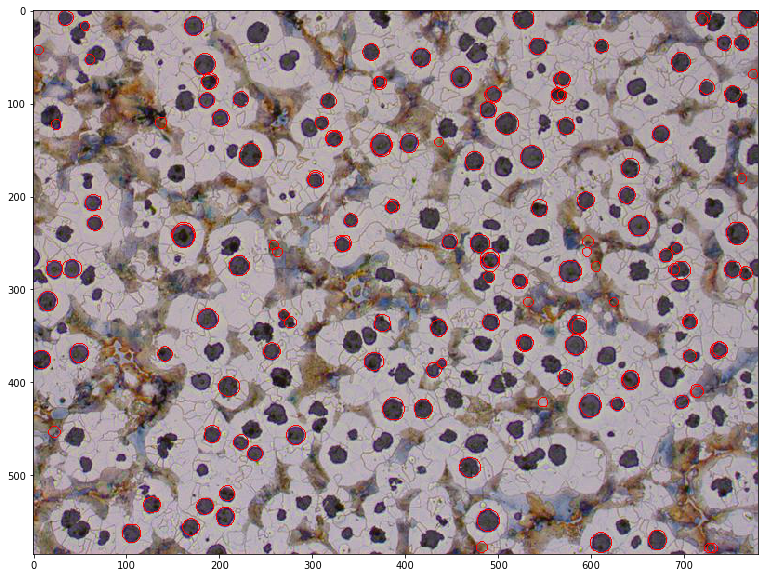

In [54]:
plt.figure(figsize=(20,10))
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    plt.plot(circx,circy,',r')

plt.imshow(img3)

In [49]:
radii

array([11, 10, 10, 10, 11, 10, 10, 12, 11, 10, 10, 10, 12, 10, 10, 12, 12,
       12, 12, 12, 13, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 11,
       10, 10, 10, 10, 10, 12, 12, 11, 11, 10, 11, 11, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 13, 11, 11, 12, 12, 12, 11, 11, 11,
       10, 10, 10, 10, 10, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 11, 11, 11, 11, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 12, 12, 11, 12, 11, 11, 13, 13, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 11, 11, 13, 13,
       13, 13, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 13, 12, 11,
       12, 11, 12, 12, 12, 11, 11, 12, 11, 11, 11, 11, 11])